# **Summary**

This project leverages data from the Framingham Heart Study to predict the ten-year risk of coronary heart disease (CHD) using several health indicators. The variables utilized include age, sex, smoking status, blood pressure measurements, glucose levels, and more. The initial challenge was cleaning the raw data, which involved identifying and addressing various missing values across the dataset. Imputation strategies were devised based on the nature of the data and its relationships observed through a correlation matrix, employing methods like median replacement, conditional imputation, and proportional assignment for missing data points.

After cleaning both the training and testing datasets, several predictive models were developed to assess the risk of CHD: K-Nearest Neighbors (KNN), Decision Tree, and Linear Regression. Each model aimed to exploit different aspects of the data. For the KNN model, the data was normalized using a min-max scaling approach, and an optimal number of neighbors was determined through minimizing the sum of squared errors, resulting in a specific k-value that provided the best fit for the data. The Decision Tree model utilized a subset of variables and was visualized to depict the decision paths and the depth used in predictions. Lastly, the Linear Regression model incorporated a broader set of variables, and performance metrics such as R-squared were calculated to gauge model accuracy and predictive power.

The results from these models yielded various degrees of success, quantified by error metrics and R-squared values, highlighting the complexity and challenges in predicting CHD risk based on available health data. Each model offered insights into the significant predictors and their impact on the outcome, demonstrating the practical implications of applying machine learning techniques in epidemiological studies. This approach not only aids in understanding the relative importance of different risk factors but also enhances the prediction of cardiovascular events, contributing to more targeted prevention strategies in clinical settings.

# **Data Overview and Cleaning Process**

## Data Description
The dataset for this project includes various health indicators from the Framingham Heart Study aimed at predicting the ten-year risk of coronary heart disease (CHD). Key variables include:

- **Age**: Participant's age at the time of the study.
- **Sex**: Participant's gender.
- **Education**: Levels of educational attainment.
- **CurrentSmoker** and **CigsPerDay**: Smoking status and average cigarettes smoked per day.
- **BPMeds**: Whether the participant is on blood pressure medication.
- **PrevalentStroke**, **PrevalentHyp**: Whether the participant had a previous stroke or hypertension.
- **Diabetes**: Indicates if the participant has diabetes.
- **TotChol**: Total cholesterol level.
- **SysBP** and **DiaBP**: Systolic and diastolic blood pressure.
- **BMI**: Body Mass Index, a measure based on height and weight.
- **HeartRate**: Participant's heart rate.
- **Glucose**: Glucose level.

## Data Challenges
Challenges encountered during the data handling phase included:

1. **Loading and Initial Observations**:
   - Data was successfully loaded from CSV files.
   - An unused column "Unnamed: 0" was identified and removed.

2. **Missing Values**:
   - Missing values were prevalent across several variables:
     - Education (85 missing in training, 20 in testing)
     - CigsPerDay (24 missing in training, 5 in testing)
     - BPMeds (37 missing in training, 16 in testing)
     - TotChol (39 missing in training, 11 in testing)
     - BMI (15 missing in training, 4 in testing)
     - Glucose (285 missing in training, 103 in testing)

3. **Imputation Strategy**:
   - **Education and CigsPerDay**: Handled using median and conditional imputation based on correlations.
   - **BPMeds**: Proportional imputation based on dataset proportions.
   - **TotChol, BMI, and Glucose**: Imputed using median values and specific strategies considering the presence of diabetes.
   - **HeartRate** (testing data): One missing value dropped due to minimal impact.

4. **Data Verification and Export**:
   - Post-imputation, the integrity of the data was rechecked.
   - Cleaned datasets were saved to new CSV files for further analysis.




In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Train Data Cleaning Process
#### Load the training from CSV files

In [22]:
train_data = pd.read_csv("./fhs_train.csv")
train_data.head()


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [23]:
train_data.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


There seems to be an unused column "Unnamed: 0", let's remove that first.


In [24]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
train_data.isnull().sum()

sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64

As seen from above, there are some missing values in a handful of variables:

- education (85 missing)
- cigsPerDay (24 missing)
- BPMeds (37 missing)
- totChol (39 missing)
- BMI (15 missing)
- glucose (285 missing)

Let's observe how to continue and remove or fill in these missing values.

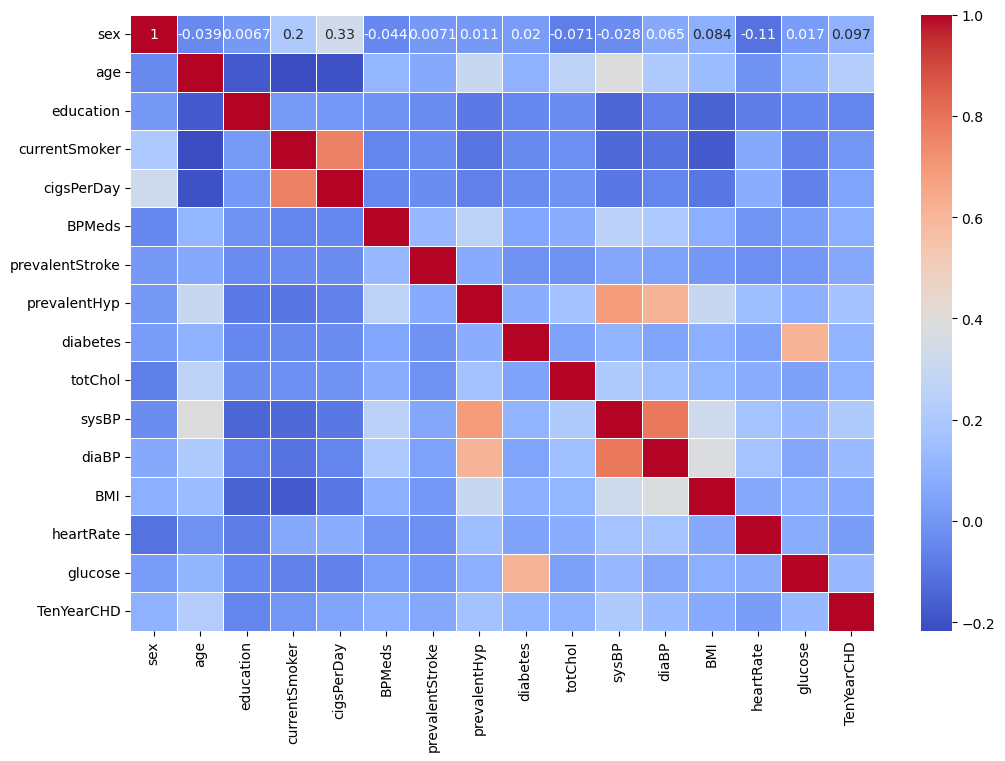

In [26]:
corr = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Using the correlation matrix, we can determine how to go about handling the nan values. From the correlation matrix, we see that:

*education*: This variable had some missing values. It doesn't have a strong correlation with any other variable, so using the median is an appropriate choice for categorical data.

*cigsPerDay*: Also had missing values, but since it's highly correlated with currentSmoker, we will use a more nuanced approach for imputation. For current smokers (currentSmoker == 1), we could impute missing cigsPerDay with the median of cigsPerDay for all current smokers. For non-smokers (currentSmoker == 0), it's reasonable to impute any missing cigsPerDay with 0.

*BPMeds*: There were missing values in this variable as well. It has a slight positive correlation with prevalentHyp and sysBP. But, we will use proportional imputation.

*totChol*, *BMI*: These variables had missing values, and they show some correlations with other variables like age, sysBP, diaBP, etc. For these continuous variables, we could use multiple imputation techniques or predict missing values based on a regression model that includes correlated predictors. However, since these correlations are not very strong, the median imputation we initially used is a robust and straightforward approach.

*glucose*: Also had missing values, but since it's highly correlated with diabetes, we will use a more nuanced approach for imputation. For glucose == 1, we could impute missing glucose with the mean of diabetics. For non-glucose (glucose == 0), it's reasonable to impute any missing glucose with mean of non-diabetics.

In [27]:
median_cigs_smokers = train_data[train_data['currentSmoker'] == 1]['cigsPerDay'].median()

# Impute missing cigsPerDay values for current smokers with the median and for non-smokers with 0
train_data.loc[(train_data['currentSmoker'] == 1) & (train_data['cigsPerDay'].isnull()), 'cigsPerDay'] = median_cigs_smokers
train_data.loc[(train_data['currentSmoker'] == 0) & (train_data['cigsPerDay'].isnull()), 'cigsPerDay'] = 0

# Verify the imputation
train_data.isnull().sum()

sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay           0
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64

In [28]:
education_train = train_data['education'].median()

#Fill with median
train_data['education'].fillna(education_train, inplace=True)

#Verify
train_data.isnull().sum()

sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64

In [29]:
totChol_train = train_data['totChol'].median()

#Fill with median
train_data['totChol'].fillna(totChol_train, inplace=True)

#Verify
train_data.isnull().sum()
bmi_train = train_data['BMI'].median()

#Fill with median
train_data['BMI'].fillna(bmi_train, inplace=True)

#Verify
train_data.isnull().sum()

sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64

In [30]:
# Calculate the mean glucose level for diabetic patients
mean_glucose_diabetic = train_data[train_data['diabetes'] == 1]['glucose'].mean()

# Calculate the mean glucose level for non-diabetic patients
mean_glucose_non_diabetic = train_data[train_data['diabetes'] == 0]['glucose'].mean()

# Function to apply the imputation logic
def impute_glucose(row):
    if pd.isnull(row['glucose']):
        return mean_glucose_diabetic if row['diabetes'] == 1 else mean_glucose_non_diabetic
    else:
        return row['glucose']

# Apply the function to the glucose column
train_data['glucose'] = train_data.apply(impute_glucose, axis=1)

#Verify
train_data.isnull().sum()

sex                 0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             37
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [31]:
# Calculate the proportion of '1's in the BPMeds column of the original training data
bpmeds_proportion = train_data['BPMeds'].mean()

bpmeds_proportion

0.02958956411072224

The proportion of 1's seems to be about 3% in the train data


In [32]:
# Calculate how many of the missing values should be assigned a '1' based on the proportion
num_ones_to_assign = int(np.round(bpmeds_proportion * 37))

# Create an array of zeros for imputation
imputed_bpmeds = np.zeros(37)

# Assign '1's based on the calculated number
imputed_bpmeds[:num_ones_to_assign] = 1

imputed_bpmeds

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

So, we will assign 1 NA value to 1 and the rest to be 0

In [33]:
# Shuffle the array to randomly distribute the '1's
np.random.shuffle(imputed_bpmeds)

# Assign the imputed values back to the original dataframe (only for the missing values)
train_data.loc[train_data['BPMeds'].isnull(), 'BPMeds'] = imputed_bpmeds

#Verify
train_data.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [34]:
train_data.to_csv("train_cleaned.csv",index=False)


There are no more missing values to deal with in the train data.

#### Test Data Cleaning Process
### Load the testing from CSV files

In [35]:
test_data = pd.read_csv("./fhs_test.csv")
test_data.head()


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [36]:
test_data.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1060.000000,1060.000000,1060.000000,1040.000000,1060.000000,1055.000000,1044.000000,1060.000000,1060.000000,1060.000000,1049.000000,1060.000000,1060.000000,1056.000000,1059.000000,957.000000,1060.000000
mean,2092.777358,0.417925,49.418868,2.046154,0.503774,9.111848,0.029693,0.003774,0.279245,0.024528,236.995234,131.064151,82.237736,25.539100,75.689330,82.357367,0.148113
std,1201.024284,0.493450,8.620858,1.042774,0.500222,11.650215,0.169822,0.061342,0.448840,0.154755,43.835233,20.743991,11.589415,3.914418,11.953153,24.931659,0.355380
min,4.000000,0.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,92.500000,48.000000,15.960000,45.000000,44.000000,0.000000
25%,1054.500000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.000000,22.850000,68.000000,72.000000,0.000000
50%,2074.500000,0.000000,49.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,235.000000,127.000000,81.000000,25.140000,75.000000,78.000000,0.000000
75%,3093.500000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,140.125000,88.000000,27.860000,82.000000,87.000000,0.000000
max,4235.000000,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,45.790000,143.000000,394.000000,1.000000


There seems to be an unused column "Unnamed: 0", let's remove that first.

In [37]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.isnull().sum()

sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64

As seen from above, there are some missing values in a handful of variables:

- education (20 missing)
- cigsPerDay (5 missing)
- BPMeds (16 missing)
- totChol (11 missing)
- BMI (4 missing)
- heartRate (1 missing)
- glucose (103 missing)

Let's observe how to continue and remove or fill in these missing values.

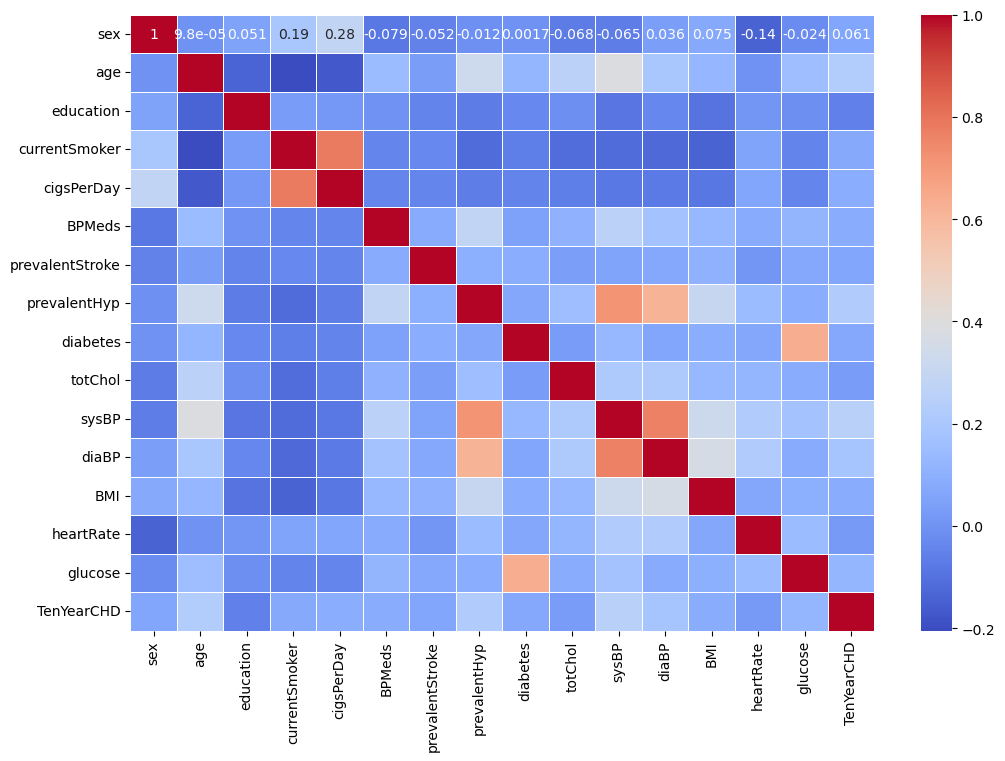

In [38]:
corr = test_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Using the correlation matrix, we can determine how to go about handling the nan values. From the correlation matrix, we see that:

*education*: This variable had some missing values. It doesn't have a strong correlation with any other variable, so using the median is an appropriate choice for categorical data.

*cigsPerDay*: Also had missing values, but since it's highly correlated with currentSmoker, we will use a more nuanced approach for imputation. For current smokers (currentSmoker == 1), we could impute missing cigsPerDay with the median of cigsPerDay for all current smokers. For non-smokers (currentSmoker == 0), it's reasonable to impute any missing cigsPerDay with 0.

*BPMeds*: There were missing values in this variable as well. It has a slight positive correlation with prevalentHyp and sysBP. But, we will use proportional imputation.

*totChol*, *BMI*: These variables had missing values, and they show some correlations with other variables like age, sysBP, diaBP, etc. For these continuous variables, we could use multiple imputation techniques or predict missing values based on a regression model that includes correlated predictors. However, since these correlations are not very strong, the median imputation we initially used is a robust and straightforward approach.

*glucose*: Also had missing values, but since it's highly correlated with diabetes, we will use a more nuanced approach for imputation. For glucose == 1, we could impute missing glucose with the mean of diabetics. For non-glucose (glucose == 0), it's reasonable to impute any missing glucose with mean of non-diabetics.

*heartrate*: Only one missing value, we can simply remove this row as it should not have a great impact on the output

In [39]:
median_cigs_smokers = test_data[test_data['currentSmoker'] == 1]['cigsPerDay'].median()

# Impute missing cigsPerDay values for current smokers with the median and for non-smokers with 0
test_data.loc[(test_data['currentSmoker'] == 1) & (test_data['cigsPerDay'].isnull()), 'cigsPerDay'] = median_cigs_smokers
test_data.loc[(test_data['currentSmoker'] == 0) & (test_data['cigsPerDay'].isnull()), 'cigsPerDay'] = 0

# Verify the imputation
test_data.isnull().sum()

sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           0
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64

In [40]:
education_test = test_data['education'].median()

#Fill with median
test_data['education'].fillna(education_test, inplace=True)

#Verify
test_data.isnull().sum()

sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64

In [41]:
totChol_test = test_data['totChol'].median()

#Fill with median
test_data['totChol'].fillna(totChol_test, inplace=True)

#Verify
test_data.isnull().sum()

sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64

In [42]:
bmi_test = test_data['BMI'].median()

#Fill with median
test_data['BMI'].fillna(bmi_test, inplace=True)

#Verify
test_data.isnull().sum()

sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64

In [43]:
# Calculate the mean glucose level for diabetic patients
mean_glucose_diabetic = test_data[test_data['diabetes'] == 1]['glucose'].mean()

# Calculate the mean glucose level for non-diabetic patients
mean_glucose_non_diabetic = test_data[test_data['diabetes'] == 0]['glucose'].mean()

# Function to apply the imputation logic
def impute_glucose(row):
    if pd.isnull(row['glucose']):
        return mean_glucose_diabetic if row['diabetes'] == 1 else mean_glucose_non_diabetic
    else:
        return row['glucose']

# Apply the function to the glucose column
test_data['glucose'] = test_data.apply(impute_glucose, axis=1)

#Verify
test_data.isnull().sum()

sex                 0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             16
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [44]:
# Calculate the proportion of '1's in the BPMeds column of the original training data
bpmeds_proportion = test_data['BPMeds'].mean()

bpmeds_proportion

0.029693486590038315

The proportion of 1's seems to be about 3% in the test data

In [45]:
# Calculate how many of the missing values should be assigned a '1' based on the proportion
num_ones_to_assign = int(np.round(bpmeds_proportion * 16))

# Create an array of zeros for imputation
imputed_bpmeds = np.zeros(16)

# Assign '1's based on the calculated number
imputed_bpmeds[:num_ones_to_assign] = 1

imputed_bpmeds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

So, we will assign 0 NA value to 1 and the rest to be 0

In [46]:
# Shuffle the array to randomly distribute the '1's
np.random.shuffle(imputed_bpmeds)

# Assign the imputed values back to the original dataframe (only for the missing values)
test_data.loc[test_data['BPMeds'].isnull(), 'BPMeds'] = imputed_bpmeds

#Verify
test_data.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [47]:
test_data.dropna(subset = ['heartRate'], inplace=True)
test_data.isnull().sum()

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

There are no more null values that need to be dealt with

In [48]:
test_data.to_csv("test_cleaned.csv",index=False)

# EDA

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("./train_cleaned.csv")
test_data = pd.read_csv("./test_cleaned.csv")
corr_matrix = train_data.corr()
print(corr_matrix["TenYearCHD"].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
prevalentHyp       0.163910
diaBP              0.133094
glucose            0.124403
diabetes           0.105644
totChol            0.099083
sex                0.097138
BPMeds             0.085606
BMI                0.071823
prevalentStroke    0.062357
cigsPerDay         0.046104
heartRate          0.023205
currentSmoker      0.001644
education         -0.052207
Name: TenYearCHD, dtype: float64


In [50]:
df_bp = train_data.loc[:, ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


<Axes: >

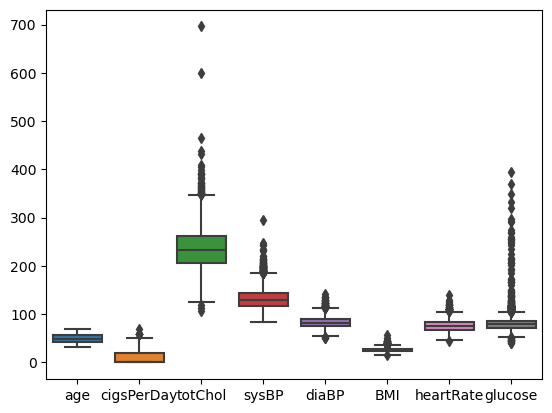

In [51]:
sns.boxplot(data=df_bp)

Based on the boxplots, we see some badly scaled variables:

- **totChol** and **glucose**: These variables show a significantly wider range and larger values - compared to others, indicating they are on a different scale.
- **sysBP** and **diaBP**: Systolic and diastolic blood pressures also appear to have a larger range, although not as pronounced as totChol and glucose.
- **age, cigsPerDay, BMI**, and **heartRate**: These variables have a much narrower range and smaller values, hence they are scaled differently compared to totChol and glucose.

Candidates for log transformation:
- **totChol**: Since this variable has a long tail with extreme values, it might benefit from a log transformation to compress the scale and normalize the distribution.
- **glucose**: Similar to totChol, it has a positive skew with some extreme values that could be normalized with a log transformation.
- **sysBP**: Though not as extreme as totChol and glucose, it has a positive skew.


<Axes: >

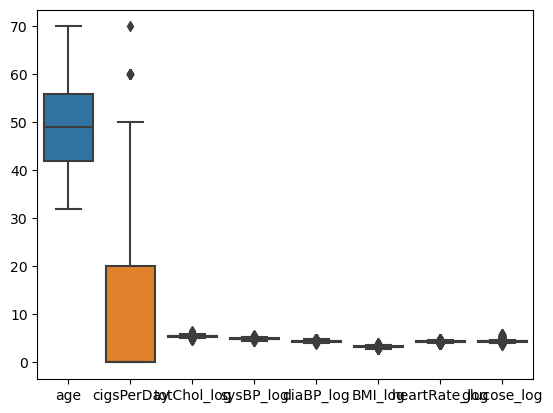

In [52]:
train_data['totChol_log'] = np.log(train_data['totChol'])
train_data['glucose_log'] = np.log(train_data['glucose'])
train_data['sysBP_log'] = np.log(train_data['sysBP'])
train_data['BMI_log'] = np.log(train_data['BMI'])
train_data['diaBP_log'] = np.log(train_data['diaBP'])
train_data['heartRate_log'] = np.log(train_data['heartRate'])

test_data['totChol_log'] = np.log(test_data['totChol'])
test_data['glucose_log'] = np.log(test_data['glucose'])
test_data['sysBP_log'] = np.log(test_data['sysBP'])
test_data['BMI_log'] = np.log(test_data['BMI'])
test_data['diaBP_log'] = np.log(test_data['diaBP'])
test_data['heartRate_log'] = np.log(test_data['heartRate'])

# train_data = train_data.drop(['totChol', 'glucose', 'sysBP', 'BMI', 'diaBP', 'heartRate'], axis=1)
sns.boxplot(data=train_data.loc[:, ['age', 'cigsPerDay', 'totChol_log', 'sysBP_log', 'diaBP_log', 'BMI_log', 'heartRate_log', 'glucose_log']])



In [53]:
cat_columns = ['sex', 'currentSmoker', 'education', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']
for c in cat_columns:
  print(train_data['TenYearCHD'].groupby(train_data[c]).describe())

      count      mean       std  min  25%  50%  75%  max
sex                                                     
0    1803.0  0.122573  0.328038  0.0  0.0  0.0  0.0  1.0
1    1377.0  0.193174  0.394931  0.0  0.0  0.0  0.0  1.0
                count      mean       std  min  25%  50%  75%  max
currentSmoker                                                     
0              1619.0  0.152563  0.359677  0.0  0.0  0.0  0.0  1.0
1              1561.0  0.153748  0.360822  0.0  0.0  0.0  0.0  1.0
            count      mean       std  min  25%  50%  75%  max
education                                                     
1.0        1310.0  0.190076  0.392511  0.0  0.0  0.0  0.0  1.0
2.0        1034.0  0.115087  0.319281  0.0  0.0  0.0  0.0  1.0
3.0         495.0  0.139394  0.346708  0.0  0.0  0.0  0.0  1.0
4.0         341.0  0.146628  0.354254  0.0  0.0  0.0  0.0  1.0
                  count      mean       std  min  25%  50%  75%  max
prevalentStroke                                          

> By looking at a summary table of TenYearCHD grouped by categorical variables, we see that there is a slight difference in the mean of women who have TenYearCHD than men (0.122 vs. 0.193). There doesn't seem to be a difference in average TenYearCHD for current vs. non-smoker, which is surprising considering general perspectives on heart health. In education, there is some variation in the averages of TenYearCHD. An education of "some high school" warrants the highest mean of 0.19 for that group, while "college" is second with a mean of 0.1466. For the proportion of the population that has prevalent strokes, the TenYearCHD average is almost 0.43, which is much higher than the population that's free of disease (0.15 average). The difference in averages persists with the prevalent hypertensive population, with an average TenYearCHD more than double those without prevalent hypertension (0.24 vs 0.112). Diabetes seems to be a strong indicator of TenYearCHD, with a 162% increase in the frequency of TenYearCHD for those with diabetes versus those without. Similarly, BPMeds is also a strong indicator with a 131% increase in the frequency of TenYearCHD.

In [54]:
corr_matrix = train_data.corr()
print(corr_matrix["TenYearCHD"].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225568
sysBP              0.205898
sysBP_log          0.200679
prevalentHyp       0.163910
diaBP              0.133094
diaBP_log          0.126061
glucose            0.124403
glucose_log        0.106308
diabetes           0.105644
totChol            0.099083
sex                0.097138
totChol_log        0.095522
BPMeds             0.085606
BMI                0.071823
BMI_log            0.068584
prevalentStroke    0.062357
cigsPerDay         0.046104
heartRate_log      0.023211
heartRate          0.023205
currentSmoker      0.001644
education         -0.052207
Name: TenYearCHD, dtype: float64


# **Results**

### KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics 

In [56]:
#Define the maxmin method to transform col to a range from 0 to 1
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

> For our analysis, in addition to the variables that had the highest correlation with TenYearCHD, we will consider the categorical variables that showed a possible relationship with TenYearCHD. We chose to include cigsPerDay as well because moking is a well-known risk factor for many diseases. Its strong impact on heart health likely makes it a key variable in the model. Because the scaled variables did not have a higher correlation coefficient with TenYearCHD as their non-scaled counterparts, we decided to include the non-scaled variables in our models.

In [57]:
# Columns of interest based on correlation and groupby
vars = ['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'sex', 'age', 'sysBP_log', 'cigsPerDay', 'diaBP_log', 'glucose_log']

# Extract the columns of interest from the training data
X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]

# Apply maxmin scaling to each column in X_train
X_train = X_train.apply(maxmin)

# Extract the columns of interest from the testing data
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]

# Apply maxmin scaling to each column in X_test
X_test = X_test.apply(maxmin)

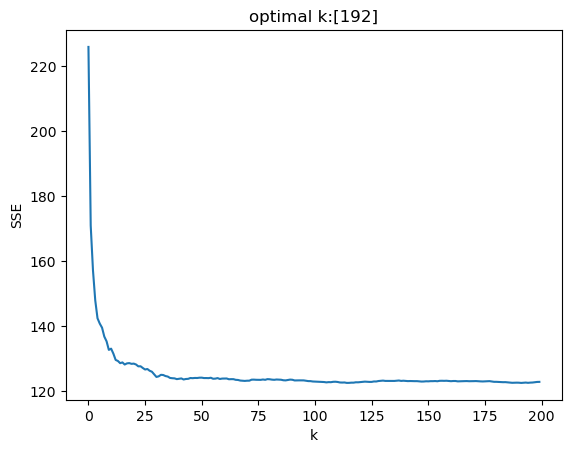

In [58]:
# Search for the optimal k
k_bar = 200
k_grid = np.arange(1,k_bar) 
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,Y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE[k] = np.sum( (Y_test-y_hat)**2 ) 
 
SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] 

plt.plot(np.arange(0,k_bar),SSE) 
plt.xlabel("k")
plt.title(f"optimal k:{k_star}")
plt.ylabel('SSE')
plt.show()

In [59]:
# Setup KNN with optimal k
knn = KNeighborsRegressor(n_neighbors = 133)
knn.fit(X_train, Y_train)
y_hat = knn.predict(X_test)
r2 = metrics.r2_score(Y_test, y_hat)
rmse = metrics.mean_squared_error(Y_test, y_hat) ** 0.5

print("R-squared: ", r2)
print("RMSE: ", rmse)

R-squared:  0.07390041518234447
RMSE:  0.34106649564160474


> The r-squared is very low, at a value of 0.074. This could be due to many reasons, as the relationships between variables can be complex. While certain categorical variables might show a significant univariate relationship with CHD, their predictive power can be diluted when combined with other variables in a multivariate context like kNN.

> After adjusting some of the variables to input into the kNN model, we got a higher $r^2$.

In [174]:
# Columns of interest based on linear correlation
vars = ['age', 'cigsPerDay', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose']

# Extract the columns of interest from the training data
X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]

# Apply maxmin scaling to each column in X_train
X_train = X_train.apply(maxmin)

# Extract the columns of interest from the testing data
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]

# Apply maxmin scaling to each column in X_test
X_test = X_test.apply(maxmin)

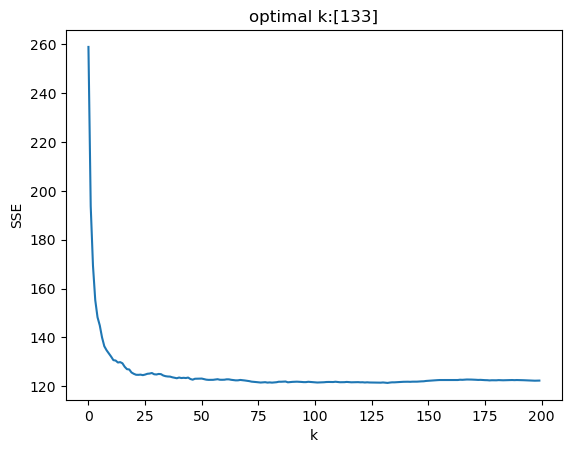

In [175]:
# Search for the optimal k
k_bar = 200
k_grid = np.arange(1,k_bar) 
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,Y_train) 
    y_hat = fitted_model.predict(X_test) 
    SSE[k] = np.sum( (Y_test-y_hat)**2 ) 
 
SSE_min = np.min(SSE) 
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index] 

plt.plot(np.arange(0,k_bar),SSE) 
plt.xlabel("k")
plt.title(f"optimal k:{k_star}")
plt.ylabel('SSE')
plt.show()

In [176]:
# Setup KNN with optimal k
knn = KNeighborsRegressor(n_neighbors = 133)
knn.fit(X_train, Y_train)
y_hat = knn.predict(X_test)
r2 = metrics.r2_score(Y_test, y_hat)

print(r2)

0.08805858479844553


### Decision Tree

> Let's explore the effectiveness of a decision tree, using the same variables we deemed could be significant through exploratory data analysis.

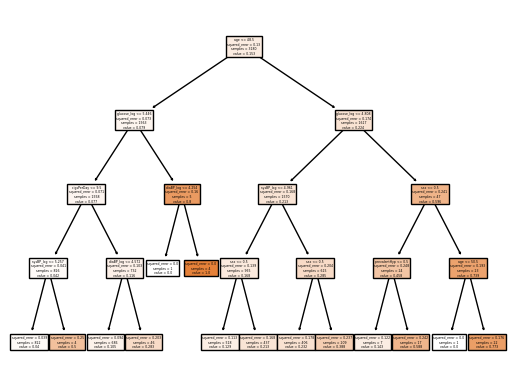

In [60]:
from sklearn import tree
from sklearn import metrics 

vars = ['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'sex', 'age', 'sysBP_log', 'cigsPerDay', 'diaBP_log', 'glucose_log']

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]

cart = tree.DecisionTreeRegressor(max_depth=4)
cart.fit(X_train, Y_train)
tree.plot_tree(cart,filled=True,feature_names=vars) 
plt.show()

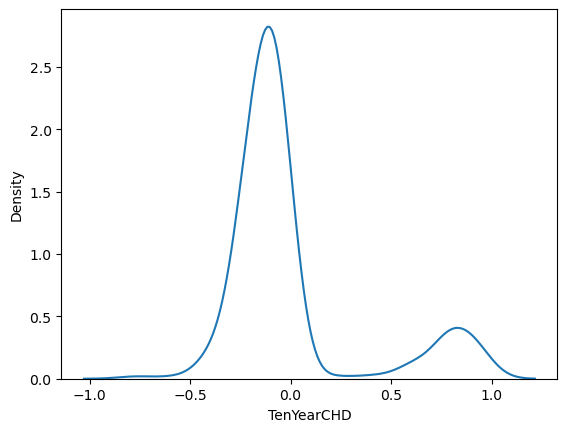

Rsq:  0.06185465443582994 

RMSE:  0.3433239870121155 

R^2:  0.06160028715472221 



In [61]:
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]
Y_hat = cart.predict(X_test)

e = Y_test - Y_hat
sns.kdeplot(e)
plt.show()
rsq = 1 - np.sum(e**2)/np.sum((Y_test - np.mean(Y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

r2 = metrics.r2_score(Y_test, Y_hat)
print('R^2: ', r2, '\n')

>  Decision Trees are non-parametric models, which means they do not assume a linear relationship between the independent and dependent variables. While this flexibility is beneficial in capturing non-linear relationships, it can also lead to overfitting, where the model captures noise in the training data that does not generalize to unseen data. Limiting the depth of the tree can mitigate this but may also limit the model's ability to capture complex patterns, which could have resulted in this low $r^2$ of 0.076. 

> While adjusting the variables, in addition to the top variables correlated with TenYearCHD, we also added the sex and diabetes variables for decision trees, as these variables showed different proportions of TenYearCHD for different levels.

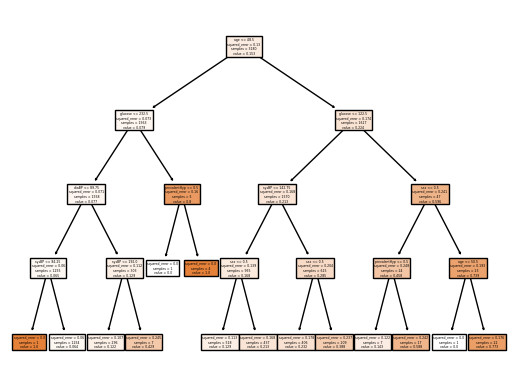

In [62]:
vars = ['age', 'sex', 'prevalentHyp', 'diaBP', 'glucose', 'diabetes', 'sysBP']

X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]

cart = tree.DecisionTreeRegressor(max_depth=4)
cart.fit(X_train, Y_train)
tree.plot_tree(cart,filled=True,feature_names=vars) 
plt.show()

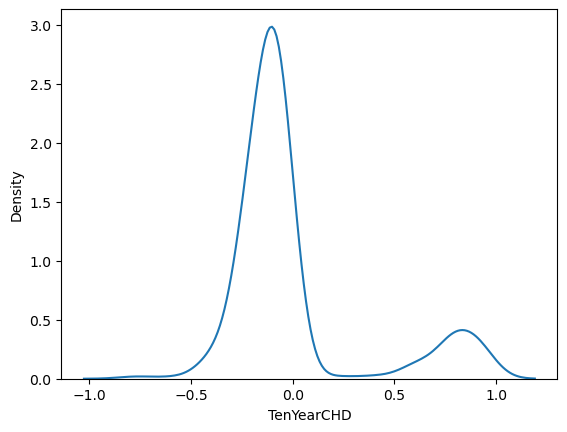

Rsq:  0.0764710218018847 

RMSE:  0.3406389824542854 

R^2:  0.07622061758006637 



In [63]:
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]
Y_hat = cart.predict(X_test)

e = Y_test - Y_hat
sns.kdeplot(e)
plt.show()
rsq = 1 - np.sum(e**2)/np.sum((Y_test - np.mean(Y_train))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

r2 = metrics.r2_score(Y_test, Y_hat)
print('R^2: ', r2, '\n')

### Linear Model

> Let's implement a linear model using the significant variables from exploratory data analysis.

In [64]:
from sklearn.linear_model import LinearRegression
vars = ['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'sex', 'age', 'sysBP_log', 'cigsPerDay', 'diaBP_log', 'glucose_log']
X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]

model = LinearRegression()
lm = model.fit(X_train,Y_train)
Y_hat = lm.predict(X_test)
linear_rsq = metrics.r2_score(Y_test, Y_hat)
print(linear_rsq)

0.09266990366206806


> This $r^2$ is the highest so far, at a value of 0.093. This could be due to linear regression's effectiveness in handling noisy variables or the fact that linear regression models are less prone to overfitting.

> After adjusting the variables we inputted into the model, we ended up getting an even higher $r^2$ of 0.10.

In [173]:
vars = ['age', 'cigsPerDay', 'sysBP', 'BMI', 'heartRate', 'glucose', 'prevalentStroke', 'prevalentHyp']
X_train = train_data.loc[:, vars]
Y_train = train_data.loc[:, "TenYearCHD"]
X_test = test_data.loc[:, vars]
Y_test = test_data.loc[:, "TenYearCHD"]

model = LinearRegression()
lm = model.fit(X_train,Y_train)
Y_hat = lm.predict(X_test)
linear_rsq = metrics.r2_score(Y_test, Y_hat)
print(linear_rsq)

0.10073343020200765
